## Environment set up

In [61]:
import warnings
warnings.filterwarnings("ignore")

In [62]:
# setting up the environment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# reading the data
DATA_PATH = "./data/"
data = pd.read_csv(DATA_PATH + "LoanApprovalPrediction.csv")

In [64]:
# let's explore the data 
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [65]:
data.info()     # we can see that the original data contains some NaN values
                # some of the numeric types are incosistent

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [66]:
data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


## Data Preprocessing and Visualization

In [67]:
# dropping the Loan_ID
data.drop('Loan_ID', axis=1, inplace=True)
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
593,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [68]:
categ_cols = list(data.columns[data.dtypes == 'object'])
print(categ_cols)

['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


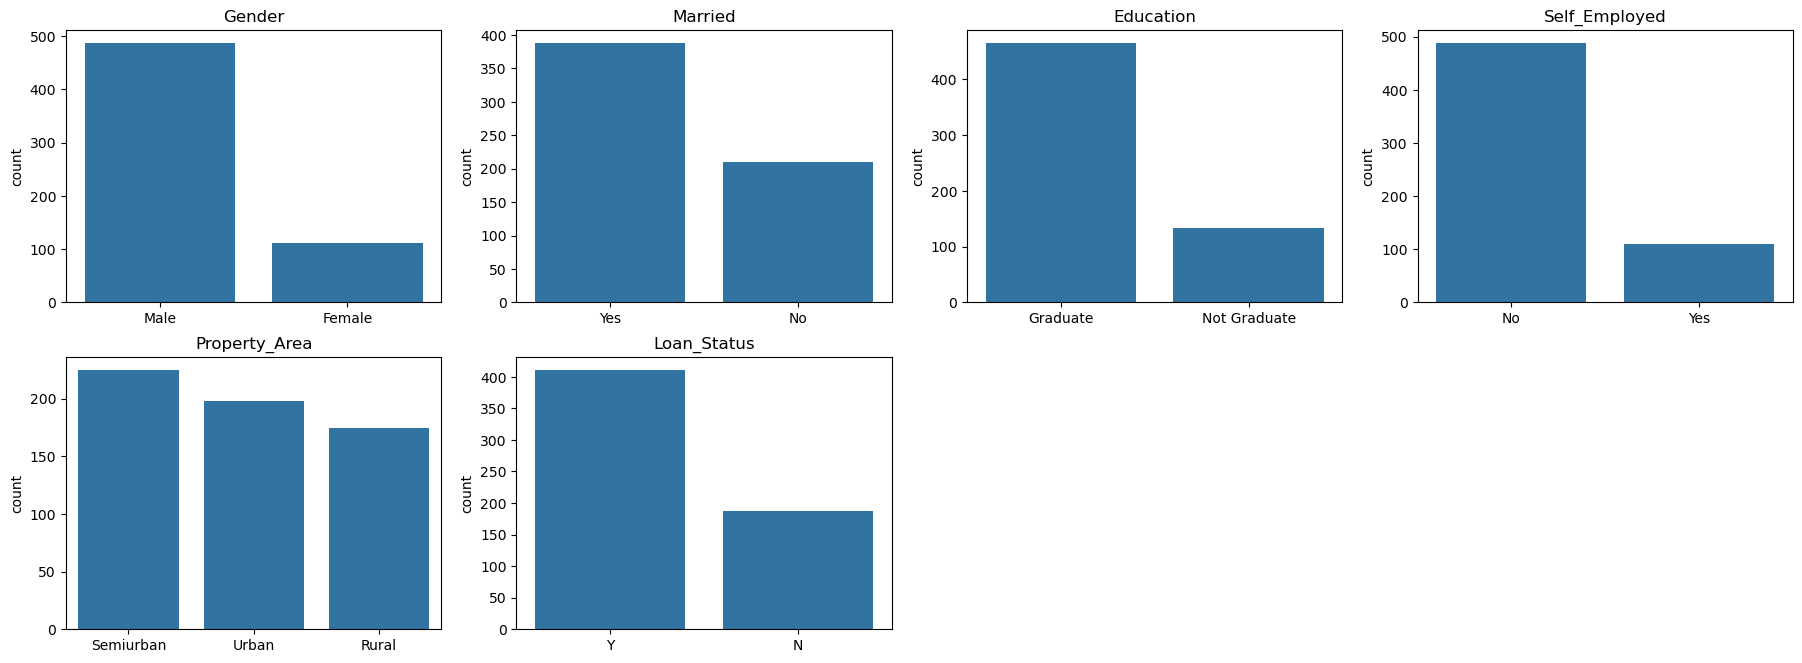

In [69]:
# plotting the data to see if any values majorly dominate the data
fig, ax = plt.subplots(figsize=(18, 36))
fig.tight_layout()
for i in range(len(categ_cols)):
    col = categ_cols[i]
    y = data[col].value_counts()
    plt.subplot(11, 4, i + 1)
    plt.xticks()
    plt.title(col)
    sns.barplot(x=list(y.index), y=y)
# it can be seen that our target variable isn't balanced, those with a positive loan status are almost 2 times more prevalent

In [70]:
# encoding our categorical variables as they're mostly binary
# using a label encoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in categ_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [71]:
data.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
593,0,0,0.0,0,0,2900,0.0,71.0,360.0,1.0,0,1
594,1,1,3.0,0,0,4106,0.0,40.0,180.0,1.0,0,1
595,1,1,1.0,0,0,8072,240.0,253.0,360.0,1.0,2,1
596,1,1,2.0,0,0,7583,0.0,187.0,360.0,1.0,2,1
597,0,0,0.0,0,1,4583,0.0,133.0,360.0,0.0,1,0


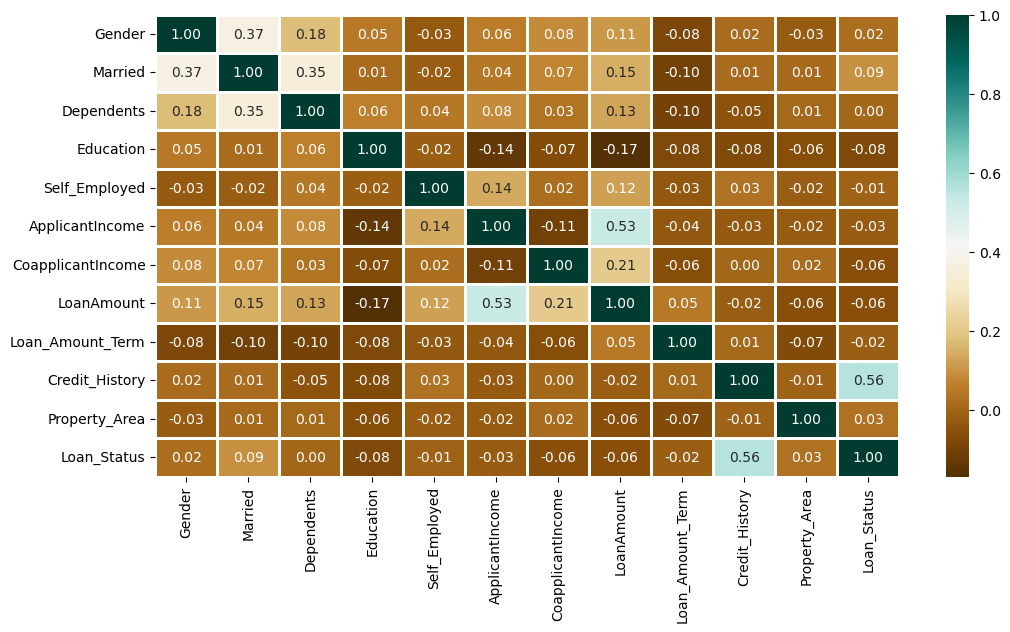

In [72]:
# plotting a heatmap to find correlations
plt.figure(figsize=(12, 6))
sns.heatmap(
    data.corr(), cmap="BrBG", fmt='.2f', linewidths=2, annot=True
);
# strong correlations exist only between ApplicantIncome and LoanAmount
# and Credit_History and Loan_Status (our y)
# (There are of course correlations between gender and marital status and dependents, etc.)

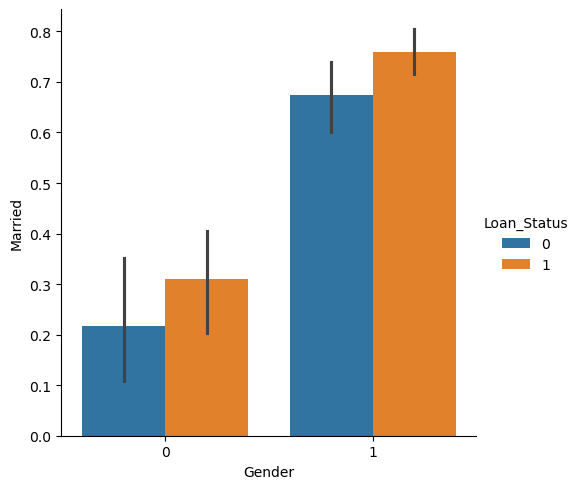

In [73]:
sns.catplot(
    x="Gender", y="Married", hue="Loan_Status", kind="bar", data=data
);
# we can see that marital status and gender don't have any significance 
# in predicting our target variable

In [74]:
data.isna().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [75]:
data = data.fillna(data.mean())

In [76]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Model training

### Splitting dataset

In [96]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score

In [83]:
X = data.drop(['Loan_Status'], axis=1)
y = data['Loan_Status']

In [84]:
X.shape, y.shape

((598, 11), (598,))

In [85]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

In [86]:
# splitting the data
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)

### Normalization

In [87]:
from sklearn.preprocessing import StandardScaler

In [90]:
# normalizing the data for parametric algorithms and KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

### Comparing default models

In [136]:
models = {
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 9]}),
    'Random Forest': (RandomForestClassifier(n_estimators=100, random_state=7), {
        'max_features': ['sqrt', 'log2'],
        'min_samples_leaf': [1, 2, 4],
        'max_depth': [10, 20, 30]
    }),
    'SVM': (SVC(random_state=7), {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}),
    'Logistic Regression': (LogisticRegression(random_state=7), {'C': [0.01, 0.1, 1, 10, 100]})
}


In [137]:
eval_not_tuned = {}

In [138]:
# training default models without tuning hyperparameters
for model_name, (model, _) in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=skf, scoring='roc_auc')
    eval_not_tuned[model_name] = scores.mean()
    print(f"ROC AUC for {model_name}: {scores.mean()}")
    print()

ROC AUC for KNN: 0.7063691918560687

ROC AUC for Random Forest: 0.7653124136555938

ROC AUC for SVM: 0.7418864369109509

ROC AUC for Logistic Regression: 0.7135422096393066



In [139]:
eval_not_tuned

{'KNN': 0.7063691918560687,
 'Random Forest': 0.7653124136555938,
 'SVM': 0.7418864369109509,
 'Logistic Regression': 0.7135422096393066}

### Tuning parameters

In [140]:
tuned_models = {}

In [141]:
# performing cross validation to tune hyperparameters
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=skf, scoring='roc_auc', verbose=0)
    grid_search.fit(X_scaled, y)
    tuned_models[model_name] = grid_search.best_estimator_
    print(f"Best params for {model_name}: {grid_search.best_params_}")
    print(f"ROC AUC for {model_name}: {grid_search.best_score_}")
    print()

Best params for KNN: {'n_neighbors': 7}
ROC AUC for KNN: 0.7076854933873509

Best params for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1}
ROC AUC for Random Forest: 0.7657423225845825

Best params for SVM: {'C': 0.1, 'kernel': 'rbf'}
ROC AUC for SVM: 0.7686079641049713

Best params for Logistic Regression: {'C': 0.01}
ROC AUC for Logistic Regression: 0.7145012621697282



In [142]:
tuned_models

{'KNN': KNeighborsClassifier(n_neighbors=7),
 'Random Forest': RandomForestClassifier(max_depth=10, random_state=7),
 'SVM': SVC(C=0.1, random_state=7),
 'Logistic Regression': LogisticRegression(C=0.01, random_state=7)}

In [143]:
eval_tuned = {}

In [144]:
# training default models without tuning hyperparameters
for model_name, model in tuned_models.items():
    scores = cross_val_score(model, X_scaled, y, cv=skf, scoring='roc_auc')
    eval_tuned[model_name] = scores.mean()
    print(f"ROC AUC for {model_name}: {scores.mean()}")
    print()

ROC AUC for KNN: 0.7076854933873509

ROC AUC for Random Forest: 0.7657423225845825

ROC AUC for SVM: 0.7686079641049713

ROC AUC for Logistic Regression: 0.7145012621697282



In [145]:
eval_not_tuned

{'KNN': 0.7063691918560687,
 'Random Forest': 0.7653124136555938,
 'SVM': 0.7418864369109509,
 'Logistic Regression': 0.7135422096393066}

In [146]:
eval_tuned

{'KNN': 0.7076854933873509,
 'Random Forest': 0.7657423225845825,
 'SVM': 0.7686079641049713,
 'Logistic Regression': 0.7145012621697282}

In [ ]:
# we can see that both random forest and SVM achieve highest scores
# among other models after tuning 

### Random forest application

In [149]:
rf = tuned_models['Random Forest']
rf

RandomForestClassifier(max_depth=10, random_state=7)

In [151]:
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, random_state=7)

In [154]:
y_pred = rf.predict(X_test_scaled)

In [158]:
rf_accuracy = metrics.accuracy_score(y_test, y_pred)*100
rf_accuracy

82.77777777777777

### SVM Application

In [160]:
svm = tuned_models["SVM"].fit(X_train_scaled, y_train)


In [161]:
y_pred = svm.predict(X_test_scaled)

In [162]:
svm_accuracy = metrics.accuracy_score(y_test, y_pred)*100
svm_accuracy

79.44444444444444

In [163]:
# we can conclude that random forest achieves overall better results on our test train split